In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
digits = load_digits()
X, y = digits.data, digits.target

In [13]:
print("Shape of X:", X.shape)   # (1797, 64) -> 1797 samples, 64 features (8x8 image flattened)
print("Shape of y:", y.shape)

Shape of X: (1797, 64)
Shape of y: (1797,)


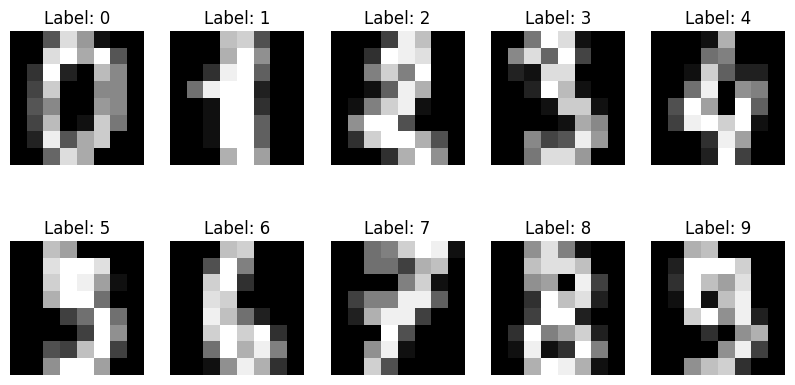

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis("off")
plt.show()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
svc = svm.SVC(gamma=0.001, C=100)
svc.fit(X_train, y_train)

,C,100
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
y_pred = svc.predict(X_test)

In [8]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9916666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.97      0.97      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



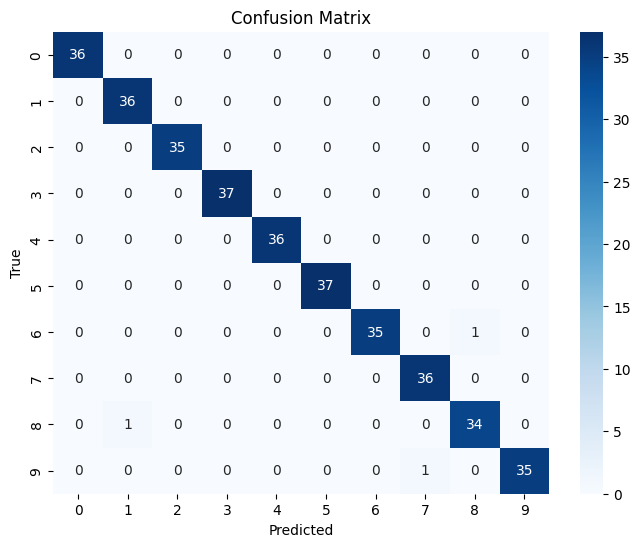

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

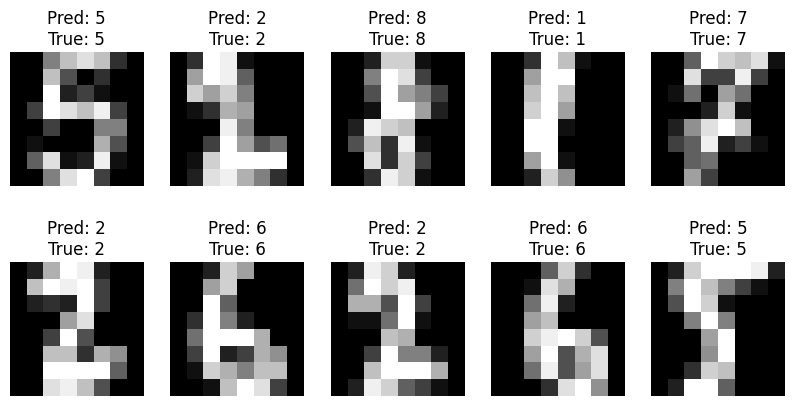

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8,8), cmap="gray")
    ax.set_title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    ax.axis("off")
plt.show()